In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [532]:
TRAIN_DATASET_PATH = 'C:/Users/emmik/Downloads/train.csv'
TEST_DATASET_PATH = 'C:/Users/emmik/Downloads/test.csv'

In [533]:
### Id - идентификационный номер квартиры
### DistrictId - идентификационный номер района
### Rooms - количество комнат
### Square - площадь
### LifeSquare - жилая площадь
### KitchenSquare - площадь кухни
### Floor - этаж
### HouseFloor - количество этажей в доме
### HouseYear - год постройки дома
### Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности.
### Social_1, Social_2, Social_3 - социальные показатели местности
### Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
### Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
### Price - цена квартиры

train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
train_df.head(10) 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [534]:
### Выведем сумму пропущенных значений

train_df.isna().sum() 

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [535]:
### Удалим значения, превышающие 200 в "LifeSquare" и "Square"

train_df.drop(index=train_df.loc[(train_df['LifeSquare'] > 200) | (train_df['Square'] > 200)].index, inplace=True) 

In [536]:
### Удалим значения, которые равны нулю и больше 6 в колонке "Rooms"

train_df.drop(index=train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] > 6)].index, inplace=True)

In [537]:
### Посчитаем, насколько процентов в среднем жилая площадь меньше общей и распределим их по комнатам

problem_lifesquare = train_df['LifeSquare'].isna() | (train_df['LifeSquare'] < 8)
print(problem_lifesquare)

mean_lifesquare_rooms = train_df.loc[~problem_lifesquare][['Rooms', 'LifeSquare']]
mean_lifesquare_rooms.loc[:, 'LifeSquare'] = train_df['LifeSquare'] / train_df['Square']
group = mean_lifesquare_rooms.groupby('Rooms').agg('mean')
group

0        True
1       False
2       False
3        True
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: LifeSquare, Length: 9981, dtype: bool


,LifeSquare
Rooms,
1.0,0.638884
2.0,0.672842
3.0,0.697484
4.0,0.689607
5.0,0.709992
6.0,0.651396


In [538]:
### Пропущенные значения заменим на основании процентов, приведенных выше

def fix_lifesquare(df, group):
    problem_lifesquare = df['LifeSquare'].isna() | (df['LifeSquare'] < 8)
    need_to_fix = df.loc[problem_lifesquare]
    print(need_to_fix[['Rooms', 'LifeSquare']])

    for rooms, life_square_part in group.itertuples():
        print(f"{rooms}: {life_square_part}")
        certain_rooms_count =  need_to_fix.Rooms == rooms
        need_to_fix.loc[certain_rooms_count, 'LifeSquare'] = need_to_fix.loc[certain_rooms_count, 'Square'] * life_square_part
    print(need_to_fix[['Rooms', 'LifeSquare']])

    df.loc[problem_lifesquare, 'LifeSquare'] = need_to_fix.loc[:, 'LifeSquare']

In [539]:
fix_lifesquare(train_df, group)

      Rooms  LifeSquare
0       3.0         NaN
3       1.0         NaN
18      1.0         NaN
20      1.0         NaN
24      1.0         NaN
...     ...         ...
9978    1.0         NaN
9981    2.0         NaN
9982    1.0    1.855415
9983    2.0         NaN
9991    2.0         NaN

[2312 rows x 2 columns]
1.0: 0.6388840865321782
2.0: 0.6728424581197634
3.0: 0.6974835597499166
4.0: 0.6896071804191951
5.0: 0.7099920939618988
6.0: 0.6513957484849456
      Rooms  LifeSquare
0       3.0   80.229658
3       1.0   25.817246
18      1.0   30.399689
20      1.0   32.567047
24      1.0   28.241198
...     ...         ...
9978    1.0   25.117307
9981    2.0   49.179863
9982    1.0   23.071633
9983    2.0   42.607093
9991    2.0   42.152758

[2312 rows x 2 columns]


C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [540]:
train_df.isna().sum() 

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4787
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [541]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,80.229658,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,25.817246,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [542]:
### Квантили, которые больше 97,5% заменим на медиану, а площадь кухни, которая меньше трех, - будет равна 3.

def fix_kitchensquare(df):
    condition = (df['KitchenSquare'].isna()) \
             | (df['KitchenSquare'] > df['KitchenSquare'].quantile(.975))

    df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()

    df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [543]:
fix_kitchensquare(train_df)
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,80.229658,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,25.817246,3.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [544]:
def fix_square(df):
    problems_square = df['Square'] < (df['LifeSquare'] + df['KitchenSquare'])
    df.loc[problems_square, 'Square'] = df[problems_square]['LifeSquare'] + df[problems_square]['KitchenSquare']

In [545]:
fix_square(train_df)
problems_square = train_df['Square'] < (train_df['LifeSquare'] + train_df['KitchenSquare'])
train_df[problems_square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [546]:
def fix_floor(df):
    floor_problems = df['Floor'] > df['HouseFloor']
    df.loc[floor_problems]
    df.loc[floor_problems, ['Floor', 'HouseFloor']] = df.loc[floor_problems, ['HouseFloor', 'Floor']].values

In [547]:
fix_floor(train_df)

In [548]:
floor_problems = train_df['Floor'] > train_df['HouseFloor']
train_df.loc[floor_problems]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [549]:
year_problems = train_df['HouseYear'] > 2021

In [550]:
train_df.loc[year_problems]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [551]:
train_df.loc[9163, 'HouseYear'] = 2011
train_df.drop(index=8828, inplace=True)
train_df.drop(index=train_df.loc[train_df.Floor >= 31].index, inplace=True)

In [552]:
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

from catboost import CatBoostRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\emmik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


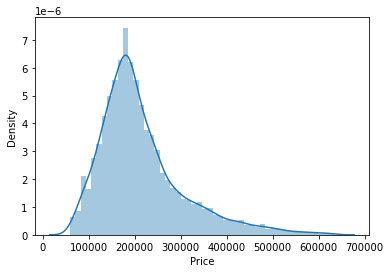

In [553]:
sns.distplot(train_df['Price']);

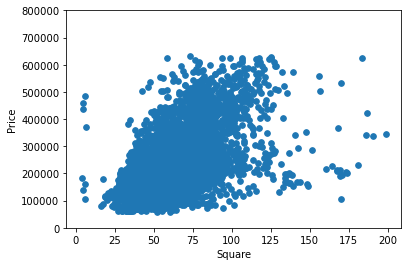

In [554]:
var = 'Square'
data = pd.concat([train_df['Price'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);

In [555]:
train_df['Square'].describe()

count    9974.000000
mean       56.640601
std        19.052819
min         3.726321
25%        42.208702
50%        52.966471
75%        66.440268
max       198.930182
Name: Square, dtype: float64

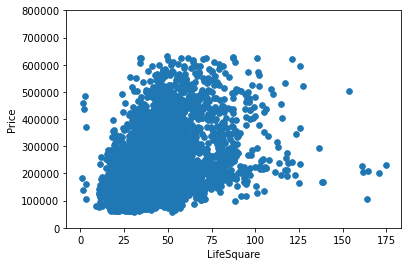

In [556]:
var = 'LifeSquare'
data = pd.concat([train_df['Price'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);

In [557]:
train_df['LifeSquare'].describe()

count    9974.000000
mean       37.581986
std        16.348643
min         0.726321
25%        25.382539
50%        33.865425
75%        45.522282
max       174.837082
Name: LifeSquare, dtype: float64

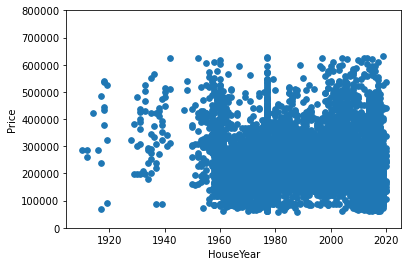

In [558]:
var = 'HouseYear'
data = pd.concat([train_df['Price'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);


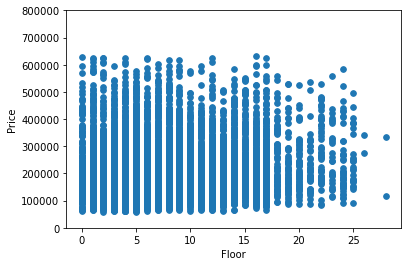

In [559]:
var = 'Floor'
data = pd.concat([train_df['Price'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);


In [560]:
train_df['Floor'].describe()

count    9974.000000
mean        7.685382
std         5.260150
min         0.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        28.000000
Name: Floor, dtype: float64

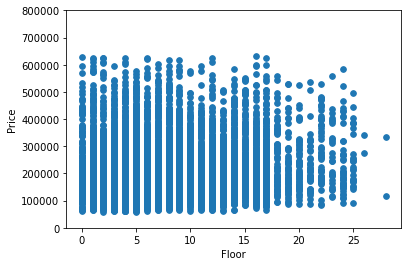

In [561]:
var = 'Floor'
data = pd.concat([train_df['Price'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);

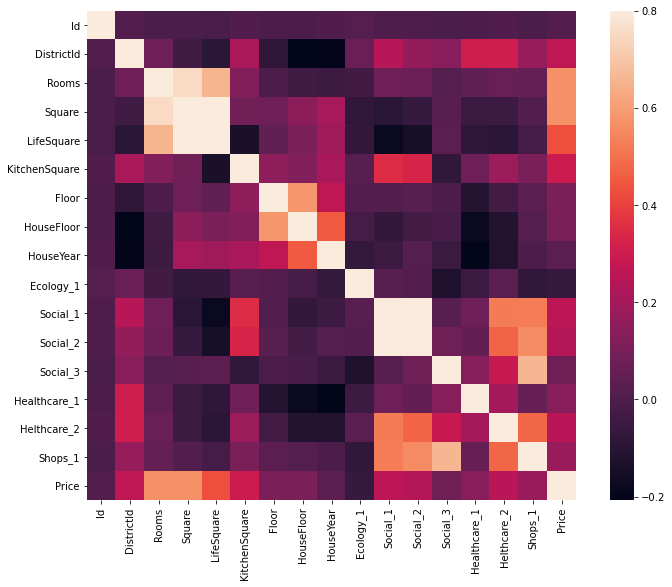

In [562]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

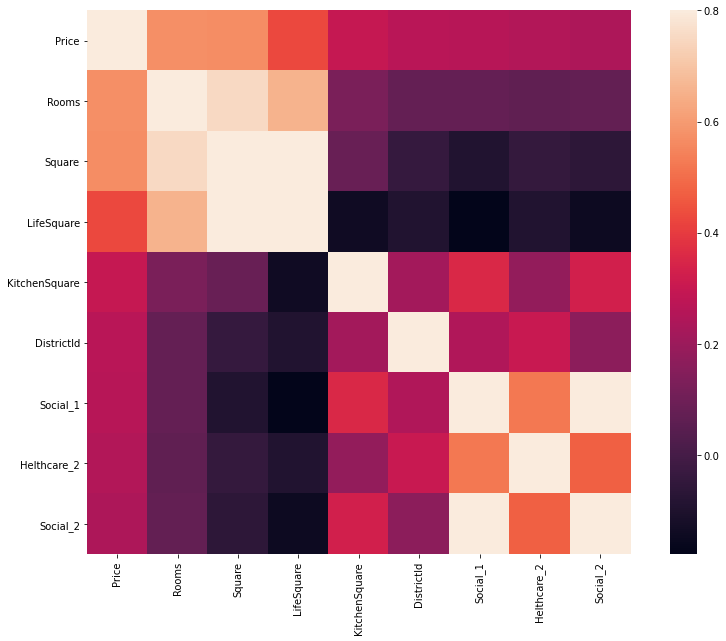

In [563]:
k = 9 
cols = corrmat.nlargest(k, 'Price')['Price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(train_df[cols].corr(), vmax=.8, square=True);

In [564]:
def change_symbols(df):
    df['Ecology_2'].replace({'A': 0, 'B': 1, 'C': 2}, inplace=True)
    df['Shops_2'].replace({'A': 0, 'B': 1, 'C': 2}, inplace=True)
    df['Ecology_3'].replace({'A': 0, 'B': 1, 'C': 2}, inplace=True)

In [565]:
def fix_healthcare(df):
    df.loc[df.Healthcare_1.isna(), 'Healthcare_1'] = 0

In [566]:
change_symbols(train_df)
fix_healthcare(train_df)

In [567]:
Y_base = train_df['Price'].copy()
Y_base

0       305018.871089
1       177734.553407
2       282078.720850
3       168106.007630
4       343995.102962
            ...      
9995    119367.455796
9996    199715.148807
9997    165953.912580
9998    171842.411855
9999    177685.627486
Name: Price, Length: 9974, dtype: float64

In [568]:
X_train_base = train_df.copy()
X_train_base.drop(labels=['Price', 'Id'], axis=1, inplace=True)
X_train_base

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,27,3.0,115.027311,80.229658,10.0,4.0,10.0,2014,0.075424,1,1,11,3097,0,0.0,0,0,1
1,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1
2,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1
3,1,1.0,40.409907,25.817246,3.0,10.0,22.0,1977,0.007122,1,1,1,264,0,0.0,0,1,1
4,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,1,1,33,8667,2,0.0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3.0,12.0,1981,0.300323,1,1,52,10311,6,0.0,1,9,1
9996,27,2.0,64.307684,37.038420,9.0,0.0,13.0,1977,0.072158,1,1,2,629,1,0.0,0,0,0
9997,178,1.0,29.648057,16.555363,5.0,3.0,5.0,1958,0.460556,1,1,20,4386,14,0.0,1,5,1
9998,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1


In [569]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_base, Y_base, test_size=0.33, shuffle=True, random_state=42)

In [570]:
rfr = RandomForestRegressor(n_estimators=100, max_features='log2', random_state=42)
rfr.fit(X_train, y_train)
print(f"RFR: {rfr.score(X_valid, y_valid)}")
gbr = GradientBoostingRegressor(learning_rate=0.11, n_estimators=100, max_depth=7, random_state=42)
gbr.fit(X_train, y_train)
print(f"GBR: {gbr.score(X_valid, y_valid)}")
cbr = CatBoostRegressor(silent=True, n_estimators=555 , depth=7, random_state=42)
cbr.fit(X_train, y_train)
print(f"CBR: {cbr.score(X_valid, y_valid)}")
vr = VotingRegressor([('rfr', rfr), ('gbr', gbr)])
vr.fit(X_train, y_train)
print(f"VR: {vr.score(X_valid, y_valid)}")

RFR: 0.7464983127581841
GBR: 0.7425483840515529
CBR: 0.7631064989214259
VR: 0.7532407060034656


In [571]:
test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')

In [572]:
fix_lifesquare(test_df, group)
fix_square(test_df)
fix_kitchensquare(test_df)
fix_healthcare(test_df)
fix_floor(test_df)
fix_healthcare(test_df)
change_symbols(test_df)

      Rooms  LifeSquare
2       2.0         NaN
4       1.0         NaN
11      3.0         NaN
13      1.0         NaN
14      1.0         NaN
...     ...         ...
4985    2.0         NaN
4986    2.0         NaN
4988    2.0         NaN
4989    2.0         NaN
4993    1.0         NaN

[1149 rows x 2 columns]
1.0: 0.6388840865321782
2.0: 0.6728424581197634
3.0: 0.6974835597499166
4.0: 0.6896071804191951
5.0: 0.7099920939618988
6.0: 0.6513957484849456
      Rooms  LifeSquare
2       2.0   40.009687
4       1.0   34.395638
11      3.0   56.216806
13      1.0   34.892124
14      1.0   28.376363
...     ...         ...
4985    2.0   54.828923
4986    2.0   52.120759
4988    2.0   44.867352
4989    2.0   41.546143
4993    1.0   30.944420

[1149 rows x 2 columns]


C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\emmik\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [573]:
test_df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [574]:
ids = test_df['Id'].copy()
test_df.drop(labels=['Id'], axis=1, inplace=True)

In [575]:
predict = pd.Series(vr.predict(test_df))

In [576]:
final = pd.DataFrame(zip(ids, predict))
final.rename(columns={0: "Id", 1: "Price"}, inplace=True)
final

,Id,Price
0,4567,159706.592781
1,5925,125309.279540
2,960,141107.308587
3,3848,127182.738954
4,746,192862.886897
...,...,...
4995,10379,173394.788034
4996,16138,364863.190763
4997,3912,147880.040473
4998,5722,195326.521344


In [577]:
final.to_csv('rf_submit.csv', index=False)